In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/DataSets/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


a) Name the libraries you will need to access the dataset, for applying the KNN classifier and Naive Bayes, and for visualizing the results.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [31]:
read_data = pd.read_csv('Dataset1.csv')
read_data.head()

,mcg,gvh,almScore,mitScore,PresenceOfHDEL,pox,vacScore,nucScore,Protien Localization
0,0.58,0.61,4.7,1.3,No,0.0,4.8,2.2,Mitochondrial
1,0.43,0.67,4.8,2.7,No,0.0,5.3,2.2,Mitochondrial
2,0.64,0.62,4.9,1.5,No,0.0,5.3,2.2,Mitochondrial
3,0.58,0.44,5.7,1.3,No,0.0,5.4,2.2,Nuclear
4,0.42,0.44,4.8,5.4,No,0.0,4.8,2.2,Mitochondrial


In [32]:
read_data.describe()

,mcg,gvh,almScore,mitScore,pox,vacScore,nucScore
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,0.472771,0.479569,5.085450,2.591147,0.002048,4.994226,2.803695
std,0.109463,0.105939,0.836916,1.398719,0.037980,0.570761,1.109756
min,0.110000,0.130000,2.100000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.410000,4.700000,1.600000,0.000000,4.800000,2.200000
50%,0.470000,0.480000,5.200000,2.100000,0.000000,5.100000,2.200000
75%,0.550000,0.550000,5.600000,3.100000,0.000000,5.300000,3.100000
max,0.900000,1.000000,10.000000,10.000000,0.830000,7.300000,10.000000


In [33]:
read_data.dtypes

mcg                     float64
gvh                     float64
almScore                float64
mitScore                float64
PresenceOfHDEL           object
pox                     float64
vacScore                float64
nucScore                float64
Protien Localization     object
dtype: object

b) Show the summary of the dataset (data distribution and class distribution)

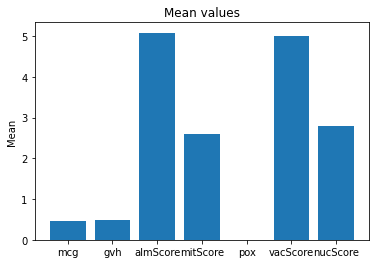

In [34]:
data_x = list(read_data.columns[0:4])+list(read_data.columns[5:8])
data_y = [np.mean(read_data.mcg),np.mean(read_data.gvh),np.mean(read_data.almScore),np.mean(read_data.mitScore),np.mean(read_data.pox), np.mean(read_data.vacScore), np.mean(read_data.nucScore)]
plt.bar(data_x, data_y)
plt.ylabel('Mean')
plt.title('Mean values')
plt.show()

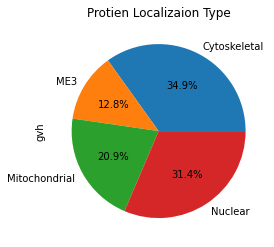

In [35]:
Groupdata = read_data.groupby("Protien Localization")["gvh"].sum()
Groupdata.plot.pie(autopct="%.1f%%");
plt.title("Protien Localizaion Type");

c) Identify continuous and categorical attributes.

In [36]:
cols = read_data.columns
num_cols = read_data._get_numeric_data().columns
print("Continous Datatype: ",list(set(num_cols)))
print("Categorical Datatype: ",list(set(cols) - set(num_cols)))

Continous Datatype:  ['mitScore', 'pox', 'nucScore', 'gvh', 'almScore', 'mcg', 'vacScore']
Categorical Datatype:  ['Protien Localization', 'PresenceOfHDEL']


d) Perform required preprocessing

In [37]:
read_data.PresenceOfHDEL.replace(to_replace=['No', 'Yes'], value=[0, 1], inplace=True)

In [38]:
read_data.head()

,mcg,gvh,almScore,mitScore,PresenceOfHDEL,pox,vacScore,nucScore,Protien Localization
0,0.58,0.61,4.7,1.3,0,0.0,4.8,2.2,Mitochondrial
1,0.43,0.67,4.8,2.7,0,0.0,5.3,2.2,Mitochondrial
2,0.64,0.62,4.9,1.5,0,0.0,5.3,2.2,Mitochondrial
3,0.58,0.44,5.7,1.3,0,0.0,5.4,2.2,Nuclear
4,0.42,0.44,4.8,5.4,0,0.0,4.8,2.2,Mitochondrial


In [39]:
X = read_data.iloc[:, :-1]
Y = read_data.iloc[:, -1]
classlabel = np.unique(Y)

In [40]:
scaler = StandardScaler()
scaler.fit(X)
XScaled = scaler.transform(X)

In [42]:
print(XScaled)

[[ 0.97996541  1.23166429 -0.46073802 ... -0.05393655 -0.34042481
  -0.54419868]
 [-0.39088864  1.79824585 -0.34120562 ... -0.05393655  0.53593632
  -0.54419868]
 [ 1.52830703  1.32609455 -0.22167323 ... -0.05393655  0.53593632
  -0.54419868]
 ...
 [-0.02532756 -0.46808041  1.21271546 ... -0.05393655 -0.34042481
   1.70941674]
 [-0.39088864 -0.75137119  1.09318307 ... -0.05393655  0.53593632
   0.98825981]
 [ 1.6196973   0.57065246  0.37598872 ... -0.05393655  0.53593632
  -0.54419868]]


e) Split the data for training and testing purpose:\
( For example If your roll no. ends in odd digit then use a 70:30 ratio for training and testing; else if your roll no. ends in even digit then use a 80:20 ratio for training and testing)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(XScaled, Y, test_size=0.30) # Roll no. : 18/94089

f) Apply KNN classification for a value of k calculated as the sum of digits of your roll no. (For example If your roll no is 13079 then the value of k is calculated as 1+3+0+7+9 = 20= 2+0 = 2 . Ignore the preceding year in your roll no e.g 18/13057; then ignore value 18 in it)\
(Note : For all summations which end up to 0, 1, 2, or 3 use k as 3. For all summations which end up to 4, 5, 6, or 7, use k as 5. Use k as 7 for the remaining possible values. )

In [17]:
k = 3 # Roll no. : 18/94089
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [18]:
Y_pred = classifier.predict(X_test)

g) Calculate the accuracy for this value of K.

In [19]:
knn_accuracy = accuracy_score(Y_test,Y_pred)
print('Accuracy : ', knn_accuracy)

Accuracy :  0.5461538461538461


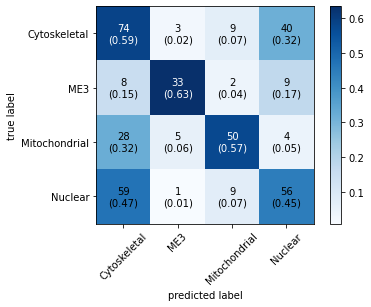

In [21]:
conf = confusion_matrix(Y_test,Y_pred)
plot_confusion_matrix(conf_mat=conf, colorbar=True, show_absolute=True, show_normed=True, class_names=classlabel);

h) Apply Naive Bayes classification on the same dataset.

In [22]:
gnb = GaussianNB()

gnb.fit(X_train, Y_train)

Y_pred = gnb.predict(X_test)

In [23]:
naiveBayes_accuracy = accuracy_score(Y_test,Y_pred)
print('Accuracy : ', naiveBayes_accuracy)

Accuracy :  0.2692307692307692


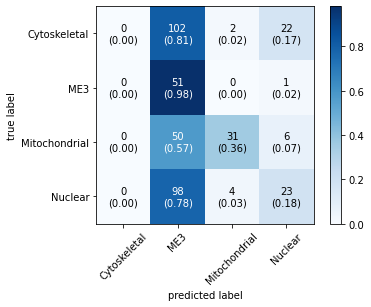

In [24]:
conf = confusion_matrix(Y_test,Y_pred)
plot_confusion_matrix(conf_mat=conf, colorbar=True, show_absolute=True, show_normed=True, class_names=classlabel);

i) Compare the results obtained using above mentioned classifiers.

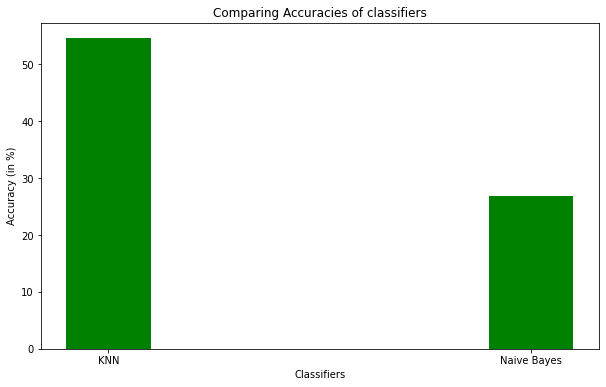

In [29]:
data = {'KNN':knn_accuracy*100, 'Naive Bayes':naiveBayes_accuracy*100}
classifiers = list(data.keys())
accuracy = list(data.values())
fig = plt.figure(figsize = (10, 6))
plt.bar(classifiers, accuracy, color ='green', width = 0.2)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy (in %)")
plt.title("Comparing Accuracies of classifiers")
plt.show()